<a href="https://colab.research.google.com/github/XEQTER5/SocialMediaAnalysis_EG/blob/main/SocialMediaAnalysis_EG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_excel("/content/sample_data/social_data.xlsx")
df.head()

,Published Date,Date,Time,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
0,2023-03-31 19:55:43.000,2023-03-31,19:55:43,CSGO,TWITTER,N/A,0,0,Text
1,2023-03-31 19:49:35.000,2023-03-31,19:49:35,CSGO,TWITTER,N/A,0,0,Text
2,2023-03-31 19:49:33.535,2023-03-31,19:49:33.535000,CSGO,TWITTER,N/A,0,0,Text
3,2023-03-31 19:49:31.583,2023-03-31,19:49:31.583000,CSGO,TWITTER,N/A,0,0,Text
4,2023-03-31 19:43:42.590,2023-03-31,19:43:42.590000,CSGO,TWITTER,Community Engagement,9517,1215,Video


In [ ]:
df['Eng/Imp'] = df['Total Engagements'] / df['Total Impressions']
df['Eng/Imp'].fillna(-1, inplace=True)
df.loc[df['Eng/Imp'] > 1, 'Eng/Imp'] = -1

df.head()

,Published Date,Date,Time,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Eng/Imp
0,2023-03-31 19:55:43.000,2023-03-31,19:55:43,CSGO,TWITTER,N/A,0,0,Text,-1.000000
1,2023-03-31 19:49:35.000,2023-03-31,19:49:35,CSGO,TWITTER,N/A,0,0,Text,-1.000000
2,2023-03-31 19:49:33.535,2023-03-31,19:49:33.535000,CSGO,TWITTER,N/A,0,0,Text,-1.000000
3,2023-03-31 19:49:31.583,2023-03-31,19:49:31.583000,CSGO,TWITTER,N/A,0,0,Text,-1.000000
4,2023-03-31 19:43:42.590,2023-03-31,19:43:42.590000,CSGO,TWITTER,Community Engagement,9517,1215,Video,0.127666


In [ ]:
df['Account'] = df['Account'].str.strip()

# Save the cleaned names back to the 'Account' column
df.to_excel("/content/sample_data/social_data_cleaned.xlsx", index=False)

# Exclude values equal to -1
cleaned_df = df[df['Eng/Imp'] != -1]

cleaned_df.head()



,Published Date,Date,Time,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Eng/Imp
4,2023-03-31 19:43:42.590,2023-03-31,19:43:42.590000,CSGO,TWITTER,Community Engagement,9517,1215,Video,0.127666
6,2023-03-31 19:40:57.383,2023-03-31,19:40:57.383000,CSGO,TWITTER,Community Engagement,1882,83,Photo,0.044102
7,2023-03-31 19:23:57.349,2023-03-31,19:23:57.349000,CSGO,TWITTER,Community Engagement,17892,3076,Video,0.171920
9,2023-03-31 18:55:51.855,2023-03-31,18:55:51.855000,CSGO,TWITTER,Community Engagement,13874,1447,Video,0.104296
10,2023-03-31 18:36:01.000,2023-03-31,18:36:01,General,FBPAGE,Community Engagement,37692,8044,Photo,0.213414


In [ ]:
#mean, meadian and mode

mean = cleaned_df['Eng/Imp'].mean()

median = cleaned_df['Eng/Imp'].median()

mode = cleaned_df['Eng/Imp'].mode().values[0]

print("Mean:", mean, "\n")
print("Median:", median, "\n")
print("Mode:", mode)

Mean: 0.05347237866111803 

Median: 0.03080242023416295 

Mode: 0.0


In [ ]:
#Question 1 : Typical Engagement rate and Likelihood of Engagement Rate

likelihood_15_percent = (cleaned_df['Eng/Imp'] >= 0.15).mean() * 100

print("Typical Engagement Rate:", mean , "\n")
print("Likelihood of achieving a 15% Engagement Rate:", likelihood_15_percent, "%")

Typical Engagement Rate: 0.05347237866111803 

Likelihood of achieving a 15% Engagement Rate: 8.162518301610541 %


In [ ]:
#Question 2: Which day or time is best for any post.

engagement_by_day = cleaned_df.groupby(cleaned_df['Published Date'].dt.day_name())['Eng/Imp'].mean()


engagement_by_hour = cleaned_df.groupby(cleaned_df['Published Date'].dt.hour)['Eng/Imp'].mean()

print("Engagement Rate by Day of the Week: \n")
print(engagement_by_day)
print()
print("Engagement Rate by Hour of the Day:\n")
print(engagement_by_hour)

Engagement Rate by Day of the Week: 

Published Date
Friday       0.050873
Monday       0.045173
Saturday     0.037795
Sunday       0.058977
Thursday     0.061035
Tuesday      0.065355
Wednesday    0.044537
Name: Eng/Imp, dtype: float64

Engagement Rate by Hour of the Day:

Published Date
2     0.008402
3     0.056562
4     0.055753
5     0.114890
6     0.079623
7     0.066568
8     0.074097
9     0.061670
10    0.047635
11    0.045271
12    0.050506
13    0.049122
14    0.050464
15    0.045204
16    0.053205
17    0.053380
18    0.045579
19    0.043598
20    0.047879
21    0.060891
22    0.020594
23    0.028594
Name: Eng/Imp, dtype: float64


In [ ]:
#To find out best day for any posts
max_engagement_day = engagement_by_day.idxmax()

#To find out best time for any post
max_engagement_hour = engagement_by_hour.idxmax()

print("Greatest engagement rate of a day in a week  : \n")
print(max_engagement_day)
print()
print("Greatest engagement rate from 24 hour :\n")
print(max_engagement_hour)

Greatest engagement rate of a day in a week  : 

Tuesday

Greatest engagement rate from 24 hour :

5


In [ ]:
# Group by game title and calculate the mean engagement rate
engagement_by_title_account = cleaned_df.groupby(['Account', 'Account Type'])['Eng/Imp'].mean()

# Sort the engagement rates in descending order
sort_engagement = engagement_by_title_account.sort_values(ascending=False)

sorted_engagement = sort_engagement.sort_index(level='Account')

# Print the game titles, account types, and their corresponding engagement rates
print("Engagement Rates by Game Title and Account Type:")
print(sorted_engagement)

Engagement Rates by Game Title and Account Type:
Account           Account Type    
CSGO              TWITTER             0.041326
Content Creators  YOUTUBE             0.061717
DOTA2             TWITTER             0.049444
                  YOUTUBE             0.050116
General           FBPAGE              0.152716
                  INSTAGRAM           0.010801
                  LINKEDIN_COMPANY    0.017950
                  TIKTOK_BUSINESS     0.053642
                  TWITTER             0.027409
                  YOUTUBE             0.032657
Valorant          YOUTUBE             0.053380
Name: Eng/Imp, dtype: float64


In [ ]:
# Group by game title, account type, and media type, and calculate the mean engagement rate
engagement_by_title_account_media = cleaned_df.groupby(['Account', 'Account Type', 'Media Type'])['Eng/Imp'].mean()

print(engagement_by_title_account_media)

# Sort the engagement rates in descending order
sorted_engagement = engagement_by_title_account_media.sort_values(ascending=False)

# Find the media type that performs the best according to each game title
best_media_by_title = sorted_engagement.groupby(level='Account').idxmax()



Account           Account Type      Media Type
CSGO              TWITTER           Link          0.011728
                                    Photo         0.023374
                                    Text          0.034500
                                    Video         0.109618
Content Creators  YOUTUBE           Video         0.061717
DOTA2             TWITTER           Link          0.056131
                                    Mixed         0.167325
                                    Photo         0.051934
                                    Text          0.036446
                                    Video         0.077349
                  YOUTUBE           Video         0.050116
General           FBPAGE            Album         0.400000
                                    Link          0.008105
                                    Photo         0.151885
                                    Text          0.163250
                                    Video         0.150597
         

In [ ]:
# Print the result
print("Best Media Type by Account:")
print(best_media_by_title)


Best Media Type by Account:
Account
CSGO                            (CSGO, TWITTER, Video)
Content Creators    (Content Creators, YOUTUBE, Video)
DOTA2                          (DOTA2, TWITTER, Mixed)
General                       (General, FBPAGE, Album)
Valorant                    (Valorant, YOUTUBE, Video)
Name: Eng/Imp, dtype: object


In [ ]:
engagement_by_account_campaign = cleaned_df.groupby(['Account', 'Campaign Name'])['Eng/Imp'].mean()

print(engagement_by_account_campaign)

# Find the best performing campaign for each account
best_campaign_by_account = engagement_by_account_campaign.groupby('Account').idxmax()
best_campaign_by_account = best_campaign_by_account.reset_index().rename(columns={'Eng/Imp': 'Best Campaign'})

print("Best Performing Campaign for Each Account:")
print(best_campaign_by_account)

Account           Campaign Name        
CSGO              Community Engagement     0.037987
                  N/A                      0.071036
Content Creators  Community Engagement     0.207375
                  Evergreen                0.083333
                  N/A                      0.035858
DOTA2             Community Engagement     0.061666
                  Evil Exhibited           0.025990
                  N/A                      0.048021
General           Community Engagement     0.059654
                  Evergreen                0.034804
                  Evil Exhibited           0.026535
                  N/A                      0.086220
Valorant          Evil Exhibited           0.053748
                  N/A                      0.047494
Name: Eng/Imp, dtype: float64
Best Performing Campaign for Each Account:
            Account                              Best Campaign
0              CSGO                               (CSGO, N/A )
1  Content Creators  (Content Cre

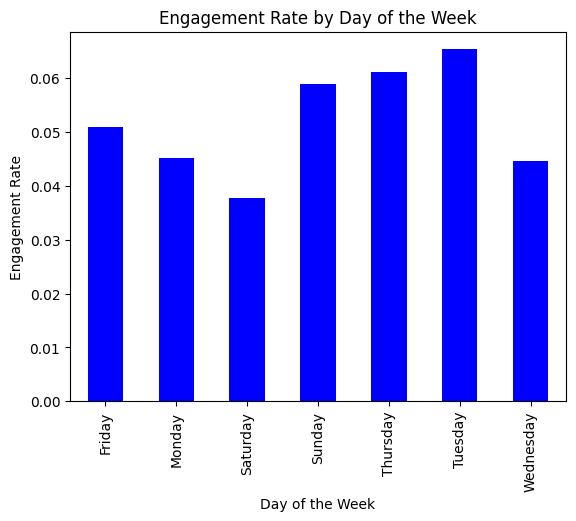

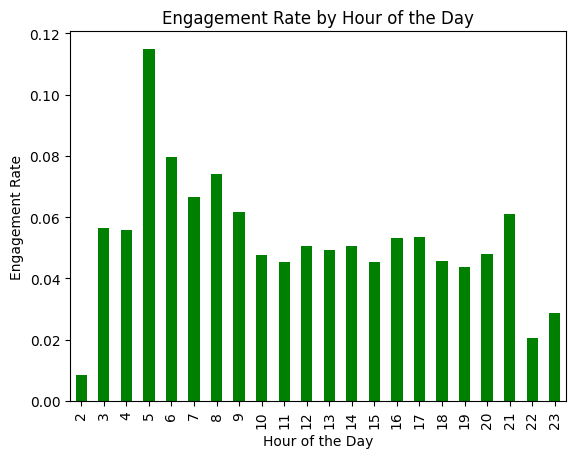

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Rest of your code...

# Visualizing Engagement Rate by Day of the Week
engagement_by_day.plot(kind='bar', color='blue')
plt.title('Engagement Rate by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Engagement Rate')
plt.show()

# Visualizing Engagement Rate by Hour of the Day
engagement_by_hour.plot(kind='bar', color='green')
plt.title('Engagement Rate by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Engagement Rate')
plt.show()
